In [1]:
#using Images
#include("../ToolBox/ToolBox.jl")
using Pkg
dict = Pkg.installed()
for entry in dict
    try
        println(entry[1], " ", entry[2])
    catch
        println(" ")
    end
end

CSV 0.6.1
ArchGDAL 0.3.1
XMLDict 0.4.1
GR 0.48.0
Statistics  
Atom 0.12.10
BenchmarkTools 0.5.0
Interpolations 0.12.9
Juno 0.8.1
VoronoiDelaunay 0.4.0
DSP 0.6.4
ImageFiltering 0.6.11
PyCall 1.91.4
Images 0.22.1
EzXML 1.0.0
Dierckx 0.4.1
IJulia 1.21.1
ImageMagick 0.7.5
Plots 1.0.5
Colors 0.11.2
Polynomials 0.7.0
PyPlot 2.9.0
Weave 0.9.4
Gadfly 1.2.1
FileIO 1.2.4
QuartzImageIO 0.7.0
FFTW 1.1.0


In [2]:
dict

Dict{String,Union{Nothing, VersionNumber}} with 27 entries:
  "CSV"             => v"0.6.1"
  "ArchGDAL"        => v"0.3.1"
  "XMLDict"         => v"0.4.1"
  "GR"              => v"0.48.0"
  "Statistics"      => nothing
  "Atom"            => v"0.12.10"
  "BenchmarkTools"  => v"0.5.0"
  "Interpolations"  => v"0.12.9"
  "Juno"            => v"0.8.1"
  "VoronoiDelaunay" => v"0.4.0"
  "DSP"             => v"0.6.4"
  "ImageFiltering"  => v"0.6.11"
  "PyCall"          => v"1.91.4"
  "Images"          => v"0.22.1"
  "EzXML"           => v"1.0.0"
  "Dierckx"         => v"0.4.1"
  "IJulia"          => v"1.21.1"
  "ImageMagick"     => v"0.7.5"
  "Plots"           => v"1.0.5"
  "Colors"          => v"0.11.2"
  "Polynomials"     => v"0.7.0"
  "PyPlot"          => v"2.9.0"
  "Weave"           => v"0.9.4"
  "Gadfly"          => v"1.2.1"
  "FileIO"          => v"1.2.4"
  ⋮                 => ⋮

In [2]:
master_meta_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/annotation/s1a-iw3-slc-vv-20170321t054035-20170321t054103-015786-019fee-006.xml"
master_pod_path = "/Users/simon/Data/Sentinel/S1A_OPER_AUX_POEORB_OPOD_20170410T121606_V20170320T225942_20170322T005942.EOF"
master_data_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/measurement/s1a-iw3-slc-vv-20170321t054035-20170321t054103-015786-019fee-006.tiff"

"/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/measurement/s1a-iw3-slc-vv-20170321t054035-20170321t054103-015786-019fee-006.tiff"

In [3]:
slave_meta_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170402T054035_20170402T054103_015961_01A51D_080F.SAFE/annotation/s1a-iw3-slc-vv-20170402t054035-20170402t054103-015961-01a51d-006.xml"
slave_pod_path = "/Users/simon/Data/Sentinel/S1A_OPER_AUX_POEORB_OPOD_20170422T121628_V20170401T225942_20170403T005942.EOF"
slave_data_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170402T054035_20170402T054103_015961_01A51D_080F.SAFE/measurement/s1a-iw3-slc-vv-20170402t054035-20170402t054103-015961-01a51d-006.tiff"

"/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170402T054035_20170402T054103_015961_01A51D_080F.SAFE/measurement/s1a-iw3-slc-vv-20170402t054035-20170402t054103-015961-01a51d-006.tiff"

In [16]:
master_view = [2000-1524:6000-1524,1200:9200]
small = 4801:7801

4801:7801

In [11]:
# load meta and pod
master_meta = Load.slc_meta(master_meta_path);
master_precise_orbit = Load.precise_orbit(master_pod_path,master_meta["t_0"]);
slave_meta = Load.slc_meta(slave_meta_path);
slave_precise_orbit = Load.precise_orbit(slave_pod_path,slave_meta["t_0"]);

meta = (master_meta,slave_meta)
precise_orbit = (master_precise_orbit,slave_precise_orbit);

In [12]:
# load DEM
footprint = SlcUtil.footprint(master_meta, master_view)
latlon_window = ((minimum(footprint[1]), maximum(footprint[1])), (minimum(footprint[2]), maximum(footprint[2])))
dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[90,90]);

In [13]:
slave_data,flat,lut =  coregister_slave(master_view,slave_data_path,meta,precise_orbit,dem)
slave_data,mosaic_view = SlcUtil.mosaic(slave_data,master_view,meta[1]);
flat,mosaic_view = SlcUtil.mosaic(flat,master_view,meta[1]);

master_data = Load.slc_data(master_data_path,master_view);
master_data,mosaic_view = SlcUtil.mosaic(master_data,master_view,meta[1]);

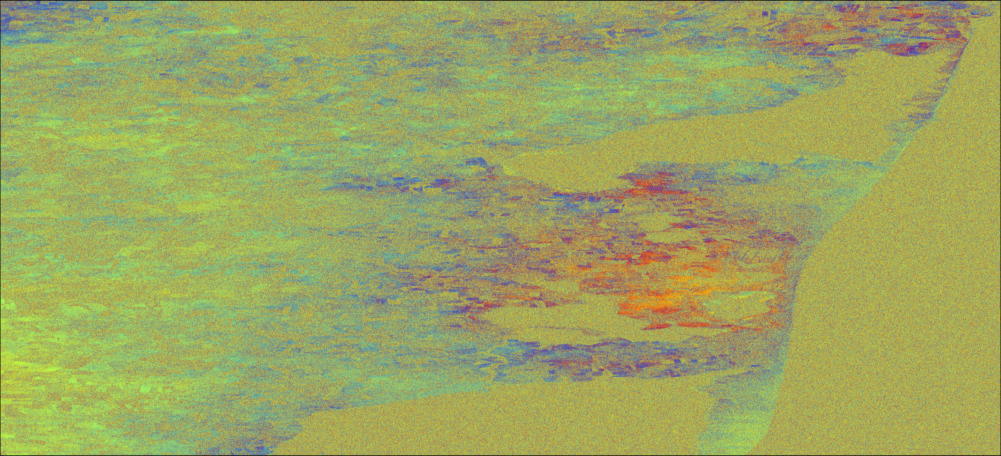

In [14]:
 phase_img = SlcUtil.plot_phase(master_data .* conj.(slave_data).*flat)

In [15]:
FileIO.save("Discussion_AA_infero.jpg",phase_img)

In [18]:
FileIO.save("Discussion_AA_infero_small.jpg",phase_img[:,small])